# Futures Visualization Pipeline

## Section 1: Time-Indexed Data

#### Library Imports

In [94]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import numpy as np
from datetime import datetime
pd.set_option('display.max_columns', 500)
mpl.rcParams['figure.dpi'] = 300 #use higher dpi charts than default

#### Data Importation

In [95]:
data_path = 'nt_data/Nov2021_daily/NQ' #primary time series
sdata_path = 'nt_data/Nov2021_daily/ES' #secondary time series
df = pd.read_csv(os.path.join(data_path, 'ohlcv.txt'),header=0,index_col=1)       #primary ohlcv
sdf = pd.read_csv(os.path.join(sdata_path, 'ohlcv.txt'),header=0,index_col=1)     #secondary ohlcv
df2 = pd.read_csv(os.path.join(data_path, 'indicators.txt'),header=0,index_col=1) #primary indicators
df['time'] = pd.to_datetime(df['time'], format="%m/%d/%Y %I:%M:%S %p") #specifying strptime format speeds things up by 10x+
sdf['time'] = pd.to_datetime(sdf['time'], format="%m/%d/%Y %I:%M:%S %p")
df

name                time      open      high       low     close  \
index                                                                      
0      ohlcv 2021-10-28 18:01:00  15679.75  15686.50  15677.00  15685.75   
1      ohlcv 2021-10-28 18:02:00  15685.25  15687.50  15683.25  15685.25   
2      ohlcv 2021-10-28 18:03:00  15685.25  15691.75  15682.75  15686.75   
3      ohlcv 2021-10-28 18:04:00  15687.00  15687.25  15681.75  15682.75   
4      ohlcv 2021-10-28 18:05:00  15682.25  15683.00  15675.25  15680.50   
...      ...                 ...       ...       ...       ...       ...   
30248  ohlcv 2021-11-29 23:56:00  16403.50  16404.50  16401.25  16402.00   
30249  ohlcv 2021-11-29 23:57:00  16402.00  16404.50  16400.25  16404.00   
30250  ohlcv 2021-11-29 23:58:00  16403.25  16404.00  16401.00  16401.25   
30251  ohlcv 2021-11-29 23:59:00  16400.75  16404.75  16399.50  16404.25   
30252  ohlcv 2021-11-30 00:00:00  16404.25  16404.50  16401.00  16403.00   

       volume  
index          
0         372  
1         207  
2         400  
3         179  
4         282  
...       ...  
30248      66  
30249     112  
30250      52  
30251      91  
30252     158  

[30253 rows x 7 columns]

#### Viewing the indicator dataframe

In [96]:
df2


name       value  plot_name
index                                                             
0                                       ATR    9.500000        ATR
1                                       ATR    6.875000        ATR
2                                       ATR    7.583333        ATR
3                                       ATR    7.062500        ATR
4                                       ATR    7.200000        ATR
...                                     ...         ...        ...
30248  Trading-revealed.com.CumulativeDelta -152.000000  DeltaOpen
30249  Trading-revealed.com.CumulativeDelta -161.000000  DeltaOpen
30250  Trading-revealed.com.CumulativeDelta -142.000000  DeltaOpen
30251  Trading-revealed.com.CumulativeDelta -149.000000  DeltaOpen
30252  Trading-revealed.com.CumulativeDelta -159.000000  DeltaOpen

[1028602 rows x 3 columns]

#### List of unique indicators

In [97]:
df2.loc[df2.name == "Trading-revealed.com.CumulativeDelta",['name']] = "CumulativeDelta" #rename CD indicator to make indexing easier
df2.name = df2.name + " " + df2.plot_name                                                #concat primary indicator name with sub-indicator name
icols = list(df2.name.unique())                                                          #indicator column names
icols

['ATR ATR',
 'Bollinger Upper band',
 'Bollinger Middle band',
 'Bollinger Lower band',
 'BOP BOP',
 'Chaikin money flow Chaikin money flow',
 'CCI CCI',
 'Chaikin oscillator Chaikin oscillator',
 'Correlation Correlation',
 'Donchian channel Mean',
 'Donchian channel Upper',
 'Donchian channel Lower',
 'Ease of movement Ease of movement',
 'KAMA KAMA',
 'Keltner channel Midline',
 'Keltner channel Upper',
 'Keltner channel Lower',
 'MACD MACD',
 'MACD Avg',
 'MACD Diff',
 'Money flow oscillator Money flow line',
 'OBV OBV',
 'RSI RSI',
 'RSI Avg',
 'SMA SMA',
 'Stoch RSI Stoch RSI',
 'Ultimate oscillator Ultimate oscillator',
 'VMA VMA',
 'VWMA VWMA',
 'Wiseman awesome oscillator Awesome oscillator',
 'CumulativeDelta DeltaClose',
 'CumulativeDelta DeltaHigh',
 'CumulativeDelta DeltaLow',
 'CumulativeDelta DeltaOpen']

#### Viewing the secondary instrument's dataframe

In [98]:
sdf

name                time     open     high      low    close  volume
index                                                                       
0      ohlcv 2021-10-31 18:01:00  4608.00  4610.50  4606.00  4609.00    2063
1      ohlcv 2021-10-31 18:02:00  4609.00  4610.25  4608.25  4608.75     472
2      ohlcv 2021-10-31 18:03:00  4608.75  4608.75  4606.50  4607.25     419
3      ohlcv 2021-10-31 18:04:00  4606.75  4609.00  4606.75  4607.75     276
4      ohlcv 2021-10-31 18:05:00  4607.75  4608.50  4607.50  4608.50     192
...      ...                 ...      ...      ...      ...      ...     ...
30239  ohlcv 2021-11-30 23:56:00  4605.75  4606.75  4605.50  4606.75     171
30240  ohlcv 2021-11-30 23:57:00  4606.75  4606.75  4605.25  4606.50     112
30241  ohlcv 2021-11-30 23:58:00  4606.25  4606.75  4606.25  4606.50      73
30242  ohlcv 2021-11-30 23:59:00  4606.50  4606.75  4606.00  4606.50      78
30243  ohlcv 2021-12-01 00:00:00  4606.75  4607.75  4606.50  4606.75     244

[30244 rows x 7 columns]

#### Merging indicator and candlestick frames

In [99]:
for name, indi_frame in df2.groupby(['name']): #trick to reindex indicators into columns
    df[name] = indi_frame.value #append each indicator as column to ohlcv df

#### Time indexing

In [100]:
df.drop('name',inplace=True,axis=1)
df = df.set_index('time') #time-based charts should have no time repeats
sdf = sdf.set_index('time')
df

open      high       low     close  volume   ATR ATR  \
time                                                                            
2021-10-28 18:01:00  15679.75  15686.50  15677.00  15685.75     372  9.500000   
2021-10-28 18:02:00  15685.25  15687.50  15683.25  15685.25     207  6.875000   
2021-10-28 18:03:00  15685.25  15691.75  15682.75  15686.75     400  7.583333   
2021-10-28 18:04:00  15687.00  15687.25  15681.75  15682.75     179  7.062500   
2021-10-28 18:05:00  15682.25  15683.00  15675.25  15680.50     282  7.200000   
...                       ...       ...       ...       ...     ...       ...   
2021-11-29 23:56:00  16403.50  16404.50  16401.25  16402.00      66  3.710847   
2021-11-29 23:57:00  16402.00  16404.50  16400.25  16404.00     112  3.749358   
2021-11-29 23:58:00  16403.25  16404.00  16401.00  16401.25      52  3.695833   
2021-11-29 23:59:00  16400.75  16404.75  16399.50  16404.25      91  3.806844   
2021-11-30 00:00:00  16404.25  16404.50  16401.00  16403.00     158  0.000000   

                      BOP BOP  Bollinger Lower band  Bollinger Middle band  \
time                                                                         
2021-10-28 18:01:00  0.631579          15685.750000           15685.750000   
2021-10-28 18:02:00  0.315789          15685.000000           15685.500000   
2021-10-28 18:03:00  0.266082          15684.669448           15685.916667   
2021-10-28 18:04:00  0.006380          15682.177543           15685.125000   
2021-10-28 18:05:00 -0.040058          15679.656873           15684.200000   
...                       ...                   ...                    ...   
2021-11-29 23:56:00  0.068431          16390.253739           16396.946429   
2021-11-29 23:57:00  0.113949          16390.333922           16397.678571   
2021-11-29 23:58:00  0.048473          16390.827796           16398.160714   
2021-11-29 23:59:00  0.119901          16391.681301           16398.982143   
2021-11-30 00:00:00  0.000000              0.000000               0.000000   

                     Bollinger Upper band     CCI CCI  \
time                                                    
2021-10-28 18:01:00          15685.750000    0.000000   
2021-10-28 18:02:00          15686.000000   66.666667   
2021-10-28 18:03:00          15687.163886   92.000000   
2021-10-28 18:04:00          15688.072457  -46.153846   
2021-10-28 18:05:00          15688.743127 -142.454955   
...                                   ...         ...   
2021-11-29 23:56:00          16403.639118  144.522893   
2021-11-29 23:57:00          16405.023221  122.729022   
2021-11-29 23:58:00          16405.493632   88.451444   
2021-11-29 23:59:00          16406.282985   91.145833   
2021-11-30 00:00:00              0.000000    0.000000   

                     Chaikin money flow Chaikin money flow  \
time                                                         
2021-10-28 18:01:00                              84.210526   
2021-10-28 18:02:00                              52.001155   
2021-10-28 18:03:00                              26.214734   
2021-10-28 18:04:00                              12.325834   
2021-10-28 18:05:00                              16.860949   
...                                                    ...   
2021-11-29 23:56:00                              -5.070715   
2021-11-29 23:57:00                              -6.309199   
2021-11-29 23:58:00                             -10.580844   
2021-11-29 23:59:00                               2.991505   
2021-11-30 00:00:00                               0.000000   

                     Chaikin oscillator Chaikin oscillator  \
time                                                         
2021-10-28 18:01:00                               0.000000   
2021-10-28 18:02:00                              -3.874332   
2021-10-28 18:03:00                             -19.248488   
2021-10-28 18:04:00                             -60.031854   
2021-10-28 18:05:00                

#### Dtype Check

In [101]:
print(df.dtypes) #confirm that the data types are as expected

open                                             float64
high                                             float64
low                                              float64
close                                            float64
volume                                             int64
ATR ATR                                          float64
BOP BOP                                          float64
Bollinger Lower band                             float64
Bollinger Middle band                            float64
Bollinger Upper band                             float64
CCI CCI                                          float64
Chaikin money flow Chaikin money flow            float64
Chaikin oscillator Chaikin oscillator            float64
Correlation Correlation                          float64
CumulativeDelta DeltaClose                       float64
CumulativeDelta DeltaHigh                        float64
CumulativeDelta DeltaLow                         float64
CumulativeDelta DeltaOpen      

#### Buffering Lagging Indicators 

In [102]:
dropped_rows = 25
df = df.iloc[dropped_rows:len(df)-dropped_rows] #drop 25 rows from start and end as a buffer for lagging indicators
df

open      high       low     close  volume   ATR ATR  \
time                                                                            
2021-10-28 18:26:00  15685.25  15685.75  15684.00  15685.25      46  3.672165   
2021-10-28 18:27:00  15685.50  15688.00  15685.25  15688.00      76  3.606296   
2021-10-28 18:28:00  15688.00  15690.00  15687.50  15689.75     104  3.527275   
2021-10-28 18:29:00  15689.50  15690.50  15689.00  15690.50      71  3.382470   
2021-10-28 18:30:00  15690.50  15690.50  15688.00  15689.50      52  3.319436   
...                       ...       ...       ...       ...     ...       ...   
2021-11-29 23:31:00  16404.00  16407.50  16404.00  16407.00      94  2.754252   
2021-11-29 23:32:00  16406.50  16409.00  16406.00  16408.75      70  2.771806   
2021-11-29 23:33:00  16408.75  16412.00  16406.25  16407.25     131  2.984534   
2021-11-29 23:34:00  16406.75  16406.75  16403.75  16404.00      66  3.021353   
2021-11-29 23:35:00  16403.50  16404.25  16402.00  16402.25      56  2.966256   

                      BOP BOP  Bollinger Lower band  Bollinger Middle band  \
time                                                                         
2021-10-28 18:26:00  0.229262          15679.053613           15682.928571   
2021-10-28 18:27:00  0.271876          15678.696291           15683.339286   
2021-10-28 18:28:00  0.308889          15678.164759           15683.839286   
2021-10-28 18:29:00  0.292222          15677.608418           15684.232143   
2021-10-28 18:30:00  0.316446          15678.080175           15684.875000   
...                       ...                   ...                    ...   
2021-11-29 23:31:00 -0.070702          16402.227536           16407.767857   
2021-11-29 23:32:00  0.042393          16402.227536           16407.767857   
2021-11-29 23:33:00 -0.001451          16402.184418           16407.553571   
2021-11-29 23:34:00 -0.078832          16401.695483           16407.089286   
2021-11-29 23:35:00 -0.147086          16401.091944           16406.428571   

                     Bollinger Upper band     CCI CCI  \
time                                                    
2021-10-28 18:26:00          15686.803530  100.037411   
2021-10-28 18:27:00          15687.982280  157.619048   
2021-10-28 18:28:00          15689.513813  182.668928   
2021-10-28 18:29:00          15690.855867  170.233791   
2021-10-28 18:30:00          15691.669825  125.846223   
...                                   ...         ...   
2021-11-29 23:31:00          16413.308178  -43.112365   
2021-11-29 23:32:00          16413.308178    7.760906   
2021-11-29 23:33:00          16412.922725   27.798461   
2021-11-29 23:34:00          16412.483089  -66.227749   
2021-11-29 23:35:00          16411.765199 -106.083976   

                     Chaikin money flow Chaikin money flow  \
time                                                         
2021-10-28 18:26:00                              16.080036   
2021-10-28 18:27:00                              15.543120   
2021-10-28 18:28:00                              16.841509   
2021-10-28 18:29:00                              21.323057   
2021-10-28 18:30:00                              26.166294   
...                                                    ...   
2021-11-29 23:31:00                              -0.970753   
2021-11-29 23:32:00                               5.399209   
2021-11-29 23:33:00                               2.675918   
2021-11-29 23:34:00                               0.536949   
2021-11-29 23:35:00                              -3.100590   

                     Chaikin oscillator Chaikin oscillator  \
time                                                         
2021-10-28 18:26:00                              46.892236   
2021-10-28 18:27:00                              69.112892   
2021-10-28 18:28:00                              98.392898   
2021-10-28 18:29:00                             124.017182   
2021-10-28 18:30:00                

In [103]:
df.describe() #sanity check on indicator values

open          high           low         close        volume  \
count  30203.000000  30203.000000  30203.000000  30203.000000  30203.000000   
mean   16213.718273  16216.131502  16211.317957  16213.743668    374.686687   
std      220.359103    220.382635    220.299820    220.341604    650.795547   
min    15597.250000  15598.750000  15595.500000  15597.000000      1.000000   
25%    16075.250000  16077.750000  16072.500000  16075.000000     39.000000   
50%    16240.250000  16243.500000  16237.000000  16240.250000     96.000000   
75%    16347.250000  16349.000000  16345.000000  16347.250000    423.000000   
max    16756.250000  16767.500000  16752.000000  16756.000000   9734.000000   

            ATR ATR       BOP BOP  Bollinger Lower band  \
count  30203.000000  30203.000000          30203.000000   
mean       4.873907      0.011860          16204.762783   
std        3.598916      0.141728            220.256953   
min        0.901680     -0.533787          15591.812105   
25%        2.381732     -0.086660          16061.570653   
50%        3.453809      0.011278          16229.265619   
75%        6.305947      0.110793          16339.708020   
max       24.780602      0.541678          16746.079784   

       Bollinger Middle band  Bollinger Upper band       CCI CCI  \
count           30203.000000          30203.000000  30203.000000   
mean            16213.588240          16222.413698      5.070634   
std               220.379137            220.802810    108.778893   
min             15602.053571          15608.412420   -466.666667   
25%             16075.660714          16084.669007    -80.019618   
50%             16240.196429          16254.755367     10.336591   
75%             16347.142857          16355.009308     88.888889   
max             16751.571429          16760.608787    466.666667   

       Chaikin money flow Chaikin money flow  \
count                           30203.000000   
mean                                1.509069   
std                                15.945350   
min                               -64.286363   
25%                                -9.545612   
50%                                 1.198432   
75%                                12.316502   
max                                62.213582   

       Chaikin oscillator Chaikin oscillator  Correlation Correlation  \
count                           30203.000000             30203.000000   
mean                                9.100069                 0.585793   
std                               496.403850                 0.364566   
min                             -6413.718000                -0.913777   
25%                               -37.753373                 0.393504   
50%                                 3.633359                 0.696807   
75%                                55.724060                 0.875821   
max                              5526.132012                 0.999216   

       CumulativeDelta DeltaClose  CumulativeDelta DeltaHigh  \
count                30203.000000               30203.000000   
mean                   123.129126                 157.124822   
std                   1707.749356                1701.375923   
min                  -8727.000000               -8515.000000   
25%                   -283.000000                -265.000000   
50%                    144.000000                 163.000000   
75%                    919.000000                 945.000000   
max                   5429.000000                5464.000000   

       CumulativeDelta DeltaLow  CumulativeDelta DeltaOpen  \
count              30203.000000               30203.000000   
mean                  89.329073                 123.158428   
std                 1712.876696                1705.552235   
min                -9003.000000               -8727.000000   
25%                 -300.000000                -282.000000   
50%                  125.000000                 143.000000   
75%                  889.000000                 918.0000

In [104]:
sdf = sdf.rename(mapper=lambda x: "ES " + x, axis=1) #prepend ES to the names of secondary columns

#### Merging primary and secondary instruments

In [105]:
cdf =  pd.concat([df,sdf],axis=1) #concatenation of primary and secondary ohlcv and indicator series
cdf

open      high       low     close  volume   ATR ATR  \
time                                                                            
2021-10-28 18:26:00  15685.25  15685.75  15684.00  15685.25    46.0  3.672165   
2021-10-28 18:27:00  15685.50  15688.00  15685.25  15688.00    76.0  3.606296   
2021-10-28 18:28:00  15688.00  15690.00  15687.50  15689.75   104.0  3.527275   
2021-10-28 18:29:00  15689.50  15690.50  15689.00  15690.50    71.0  3.382470   
2021-10-28 18:30:00  15690.50  15690.50  15688.00  15689.50    52.0  3.319436   
...                       ...       ...       ...       ...     ...       ...   
2021-11-30 23:56:00       NaN       NaN       NaN       NaN     NaN       NaN   
2021-11-30 23:57:00       NaN       NaN       NaN       NaN     NaN       NaN   
2021-11-30 23:58:00       NaN       NaN       NaN       NaN     NaN       NaN   
2021-11-30 23:59:00       NaN       NaN       NaN       NaN     NaN       NaN   
2021-12-01 00:00:00       NaN       NaN       NaN       NaN     NaN       NaN   

                      BOP BOP  Bollinger Lower band  Bollinger Middle band  \
time                                                                         
2021-10-28 18:26:00  0.229262          15679.053613           15682.928571   
2021-10-28 18:27:00  0.271876          15678.696291           15683.339286   
2021-10-28 18:28:00  0.308889          15678.164759           15683.839286   
2021-10-28 18:29:00  0.292222          15677.608418           15684.232143   
2021-10-28 18:30:00  0.316446          15678.080175           15684.875000   
...                       ...                   ...                    ...   
2021-11-30 23:56:00       NaN                   NaN                    NaN   
2021-11-30 23:57:00       NaN                   NaN                    NaN   
2021-11-30 23:58:00       NaN                   NaN                    NaN   
2021-11-30 23:59:00       NaN                   NaN                    NaN   
2021-12-01 00:00:00       NaN                   NaN                    NaN   

                     Bollinger Upper band     CCI CCI  \
time                                                    
2021-10-28 18:26:00          15686.803530  100.037411   
2021-10-28 18:27:00          15687.982280  157.619048   
2021-10-28 18:28:00          15689.513813  182.668928   
2021-10-28 18:29:00          15690.855867  170.233791   
2021-10-28 18:30:00          15691.669825  125.846223   
...                                   ...         ...   
2021-11-30 23:56:00                   NaN         NaN   
2021-11-30 23:57:00                   NaN         NaN   
2021-11-30 23:58:00                   NaN         NaN   
2021-11-30 23:59:00                   NaN         NaN   
2021-12-01 00:00:00                   NaN         NaN   

                     Chaikin money flow Chaikin money flow  \
time                                                         
2021-10-28 18:26:00                              16.080036   
2021-10-28 18:27:00                              15.543120   
2021-10-28 18:28:00                              16.841509   
2021-10-28 18:29:00                              21.323057   
2021-10-28 18:30:00                              26.166294   
...                                                    ...   
2021-11-30 23:56:00                                    NaN   
2021-11-30 23:57:00                                    NaN   
2021-11-30 23:58:00                                    NaN   
2021-11-30 23:59:00                                    NaN   
2021-12-01 00:00:00                                    NaN   

                     Chaikin oscillator Chaikin oscillator  \
time                                                         
2021-10-28 18:26:00                              46.892236   
2021-10-28 18:27:00                              69.112892   
2021-10-28 18:28:00                              98.392898   
2021-10-28 18:29:00                             124.017182   
2021-10-28 18:30:00                

In [106]:
cdf.isna().sum() #NA values arise where data is missing from one series but is present in the other

open                                             1407
high                                             1407
low                                              1407
close                                            1407
volume                                           1407
ATR ATR                                          1407
BOP BOP                                          1407
Bollinger Lower band                             1407
Bollinger Middle band                            1407
Bollinger Upper band                             1407
CCI CCI                                          1407
Chaikin money flow Chaikin money flow            1407
Chaikin oscillator Chaikin oscillator            1407
Correlation Correlation                          1407
CumulativeDelta DeltaClose                       1407
CumulativeDelta DeltaHigh                        1407
CumulativeDelta DeltaLow                         1407
CumulativeDelta DeltaOpen                        1407
Donchian channel Lower      

In [107]:
cdf = cdf.dropna() #only ~2 days of missing data, can be dropped without much issue
cdf

open      high       low     close  volume   ATR ATR  \
time                                                                            
2021-10-31 18:01:00  15885.25  15898.25  15871.00  15884.75  1187.0  5.240696   
2021-10-31 18:02:00  15884.25  15886.50  15878.00  15878.75   359.0  5.473504   
2021-10-31 18:03:00  15878.00  15879.25  15873.50  15877.50   186.0  5.493254   
2021-10-31 18:04:00  15877.50  15882.00  15874.75  15874.75   156.0  5.618735   
2021-10-31 18:05:00  15875.50  15879.25  15873.00  15876.75   114.0  5.663826   
...                       ...       ...       ...       ...     ...       ...   
2021-11-29 23:31:00  16404.00  16407.50  16404.00  16407.00    94.0  2.754252   
2021-11-29 23:32:00  16406.50  16409.00  16406.00  16408.75    70.0  2.771806   
2021-11-29 23:33:00  16408.75  16412.00  16406.25  16407.25   131.0  2.984534   
2021-11-29 23:34:00  16406.75  16406.75  16403.75  16404.00    66.0  3.021353   
2021-11-29 23:35:00  16403.50  16404.25  16402.00  16402.25    56.0  2.966256   

                      BOP BOP  Bollinger Lower band  Bollinger Middle band  \
time                                                                         
2021-10-31 18:01:00  0.273321          15846.173430           15860.410714   
2021-10-31 18:02:00  0.215198          15845.266907           15862.053571   
2021-10-31 18:03:00  0.183012          15845.283653           15863.535714   
2021-10-31 18:04:00  0.211474          15846.556352           15864.964286   
2021-10-31 18:05:00  0.192427          15847.766704           15866.428571   
...                       ...                   ...                    ...   
2021-11-29 23:31:00 -0.070702          16402.227536           16407.767857   
2021-11-29 23:32:00  0.042393          16402.227536           16407.767857   
2021-11-29 23:33:00 -0.001451          16402.184418           16407.553571   
2021-11-29 23:34:00 -0.078832          16401.695483           16407.089286   
2021-11-29 23:35:00 -0.147086          16401.091944           16406.428571   

                     Bollinger Upper band     CCI CCI  \
time                                                    
2021-10-31 18:01:00          15874.647998  422.403169   
2021-10-31 18:02:00          15878.840236  209.519810   
2021-10-31 18:03:00          15881.787776  119.060648   
2021-10-31 18:04:00          15883.372220   95.158287   
2021-10-31 18:05:00          15885.090439   72.325045   
...                                   ...         ...   
2021-11-29 23:31:00          16413.308178  -43.112365   
2021-11-29 23:32:00          16413.308178    7.760906   
2021-11-29 23:33:00          16412.922725   27.798461   
2021-11-29 23:34:00          16412.483089  -66.227749   
2021-11-29 23:35:00          16411.765199 -106.083976   

                     Chaikin money flow Chaikin money flow  \
time                                                         
2021-10-31 18:01:00                               8.257996   
2021-10-31 18:02:00                              -1.264228   
2021-10-31 18:03:00                               0.431540   
2021-10-31 18:04:00                              -3.155201   
2021-10-31 18:05:00                              -1.622379   
...                                                    ...   
2021-11-29 23:31:00                              -0.970753   
2021-11-29 23:32:00                               5.399209   
2021-11-29 23:33:00                               2.675918   
2021-11-29 23:34:00                               0.536949   
2021-11-29 23:35:00                              -3.100590   

                     Chaikin oscillator Chaikin oscillator  \
time                                                         
2021-10-31 18:01:00                             104.416519   
2021-10-31 18:02:00                               6.965165   
2021-10-31 18:03:00                             -10.376392   
2021-10-31 18:04:00                             -66.163721   
2021-10-31 18:05:00                

##### Time-Indexed Chart Plotting

In [108]:
def plot_candles(ax, dframe, o_name, h_name, l_name, c_name, bodyw = 2):
    """
    Plots candlestick charts on the given axis, using data from the given dataframe. Must specify each ohlcv column's name in the provided dataframe.
    """
    ax.vlines(dframe.index, dframe[l_name], dframe[h_name], color='black',lw=bodyw/2,snap=False) #wicks from high to low of each candle
    color  = np.where(dframe[c_name] >= dframe[o_name],'green','red')                            #get candle color scheme by comparing open and close
    ax.vlines(dframe.index, dframe[c_name], dframe[o_name],color=color,lw=bodyw,snap=False)      #turn off snapping in order to center wicks

day_grps = cdf.groupby(cdf.index.floor('d')) #group each minute by the day it came from
ddfs = []
for name, ddf in day_grps:
    if ((len(ddf)>=500)): #filter for days with full cash session or longer
        ddf = ddf[(ddf.index.hour >= 8) & (ddf.index.hour < 16)]
        ddfs.append(ddf)
    
pct_show = 0.15                                                           #percentage of plots to show
n_plots = int(len(ddfs)*pct_show)                                         #convert to number of plots to show
fig, axs = plt.subplots(n_plots,1 ,sharex=False, figsize=(30,10*n_plots)) #dynamically create axes by number of days available

for i, df in enumerate(ddfs):
    if i > n_plots-1:
        break
    plot_candles(axs[i],df,'open','high','low','close') #plot minute chart for each day
fig.suptitle('Minute Charts for Cash Session Hours',fontsize=24,y=0.97)
fig.tight_layout()



#### Time-Indexed Indicator Plotting

In [109]:
def plot_vol(ax, dframe, o_name, c_name, vol_name,bodyw=2):
    """
    Plots colored volume bars on the given axis, using the given dataframe.
    """
    color  = np.where(dframe[c_name] >= dframe[o_name],'green','red') #get volume bar color by comparing open and close
    ax.vlines(dframe.index, dframe[vol_name],0,color=color,lw=bodyw,snap=False)   #autoscale vol bar width based on max volume
    ax.set_title('Volume',loc='left')

def plot_bb(ax, dframe, bb_upper_name, bb_lower_name,lw):
    """
    Plots the upper and lower bolinger bands on the given axis, using the given dataframe. The zone between bands is filled with the bands' line color.
    """
    ax.plot(dframe.index, dframe[bb_lower_name],color='orange',lw=lw,linestyle='dashed')
    ax.plot(dframe.index, dframe[bb_upper_name],color='orange',lw=lw,linestyle='dashed')
    ax.fill_between(dframe.index, dframe[bb_upper_name], dframe[bb_lower_name],color='orange',alpha=0.05)

def plot_rsi(ax, dframe, rsi_name):
    """
    Plots RSI on the given axis, using the given dataframe with the name of rsi column specified as rsi_name.  
    """
    ax.plot(dframe.index, dframe[rsi_name],color='pink')
    ax.axhline(70,color='black') #over bought zone
    ax.axhline(30,color='black') #over sold zone
    ax.fill_between(dframe.index, 70, 30,color='purple',alpha=0.05) #shade the area between zones
    ax.set_title('RSI',loc='left')
    
def plot_cd(ax, dframe, cd_open_name, cd_high_name,cd_low_name,cd_close_name,bodyw):
    plot_candles(ax,dframe,cd_open_name,cd_high_name,cd_low_name,cd_close_name,bodyw) #reuse the plot candles function
    ax.set_title('CD',loc='left')

def plot_macd(ax, dframe, macd_name, macd_diff_name, macd_avg_name):
    """
    Plots the MACD, MACD average and MACD difference histogram on the given axis, using the given dataframe.
    """

    ax.plot(dframe.index, dframe[macd_name],color='blue')
    ax.plot(dframe.index, dframe[macd_avg_name],color='red')
    color = np.where(dframe[macd_diff_name] >=0, 'green','red')
    ax.bar(dframe.index, dframe[macd_diff_name],color=color,width=0.0005) #macd difference histogram
    ax.set_title('MACD',loc='left')

def plot_indis_demo(dframe, o_name, h_name, l_name, c_name, vol_name, bodyw = 2, ax_lambda=None):
    """
    Demo of how some selected indicators can be plotted for a given day. 
    Here I will show a colored volume bars, Kaufman's Adaptive Moving Average (KAMA), bolinger bands, Cummulative Delta, RSI and MACD. 
    The ax_lambda modifier function is applied to all axes after plotting, using dframe as its secondary argument.
    """
    n_indi_panels = 4                       #number of sub panels for indicators beneath the primary chart
    height_ratios = [2] + [1]*n_indi_panels #dynamically generate height ratios list
    fig, axs = plt.subplots(1+n_indi_panels,1 ,sharex=False, figsize=(30,10 + n_indi_panels*10/3), gridspec_kw={'height_ratios': height_ratios})
    axs[0].set_title('NQ 1m',loc='left')
    #candlesticks
    plot_candles(axs[0],dframe,o_name,h_name,l_name,c_name,bodyw)

    #volume
    plot_vol(axs[1],dframe,o_name,c_name,vol_name)

    #KAMA
    axs[0].plot(dframe.index, dframe['KAMA KAMA'],color='purple',lw=bodyw/2)

    #bolinger bands
    plot_bb(axs[0],dframe,'Bollinger Lower band','Bollinger Upper band',lw=bodyw/2)

    #Cummulative Delta
    plot_cd(axs[2],dframe,"CumulativeDelta DeltaOpen","CumulativeDelta DeltaHigh","CumulativeDelta DeltaLow","CumulativeDelta DeltaClose",bodyw)
    #RSI
    plot_rsi(axs[3],dframe,"RSI RSI")

    #MACD
    plot_macd(axs[4],dframe,'MACD MACD','MACD Diff','MACD Avg')

    fig.tight_layout()

    if ax_lambda is not None:
        for ax in axs:
            ax_lambda(ax, dframe)
    return fig, axs


f, a = plot_indis_demo(ddfs[0],'open','high','low','close','volume')
f.suptitle('Indicator Plotting Demo',fontsize=24)


Text(0.5, 0.98, 'Indicator Plotting Demo')

#### Dual Instrument Plotting

In [110]:
def append_prefix(args, prefix):
    """
    Appends prefix to each element in args list.
    """
    for i, arg in enumerate(args):
        args[i] = prefix + " " + arg
    return args

def plot_dual_instrument_demo(dframe,secondary_prefix, o_name, h_name, l_name, c_name, vol_name, bodyw = 2):
    """
    Demo of how multiple instruments can be plotted side-by-side for a given day. 
    Here I will add volume beneath each instrument, but you can add as many indicators as needed using the same method.
    """
    n_indi_panels = 1                       #number of sub panels for indicators beneath the primary chart
    height_ratios = [2] + [1]*n_indi_panels #dynamically generate height ratios list
    fig, axs = plt.subplots(1+n_indi_panels,2 ,sharex=False, figsize=(30*2,30 + n_indi_panels*10/3), gridspec_kw={'height_ratios': height_ratios})
    axs[0][0].set_title('NQ 1m',loc='left')
    axs[0][1].set_title('ES 1m',loc='left')
    
    #candlesticks
    plot_candles(axs[0][0],dframe,o_name,h_name,l_name,c_name,bodyw)
    plot_candles(axs[0][1],dframe, *append_prefix([o_name,h_name,l_name,c_name],secondary_prefix),bodyw)

    #volume
    plot_vol(axs[1][0],dframe,o_name,c_name,vol_name)
    plot_vol(axs[1][1],dframe,*append_prefix([o_name,c_name,vol_name],secondary_prefix))


    fig.suptitle('Dual Instrument Plotting Demo',fontsize=24,y=1)
    fig.tight_layout()


plot_dual_instrument_demo(ddfs[0],'ES','open','high','low','close','volume') #plot NQ and ES side-by-side

## Section 2: Non-Time-Indexed Data

#### Data Importation

In [111]:

data_path = 'nt_data/Nov2021_10R/NQ/11_23' #price based range series (non-time based candlestick aggregation)
df = pd.read_csv(os.path.join(data_path, 'ohlcv.txt'),header=0,index_col=1)       #primary ohlcv
df2 = pd.read_csv(os.path.join(data_path, 'indicators.txt'),header=0,index_col=1) #primary indicators
df['time'] = pd.to_datetime(df['time'], format="%m/%d/%Y %I:%M:%S %p") #specifying strptime format speeds things up by more than 10x
df

name                time      open      high       low     close  \
index                                                                      
0      ohlcv 2021-11-23 18:00:00  16300.75  16303.25  16300.75  16303.25   
1      ohlcv 2021-11-23 18:00:00  16303.50  16304.50  16302.00  16302.00   
2      ohlcv 2021-11-23 18:00:00  16301.75  16303.00  16300.50  16303.00   
3      ohlcv 2021-11-23 18:00:00  16303.25  16303.50  16301.00  16301.00   
4      ohlcv 2021-11-23 18:00:00  16300.75  16303.00  16300.50  16303.00   
...      ...                 ...       ...       ...       ...       ...   
22160  ohlcv 2021-11-26 13:14:54  16041.75  16043.50  16041.00  16043.50   
22161  ohlcv 2021-11-26 13:14:55  16043.75  16044.00  16041.50  16041.50   
22162  ohlcv 2021-11-26 13:14:56  16041.25  16042.00  16039.50  16039.50   
22163  ohlcv 2021-11-26 13:14:57  16039.25  16041.75  16039.25  16041.75   
22164  ohlcv 2021-11-26 13:14:58  16042.00  16044.00  16042.00  16044.00   

       volume  
index          
0          25  
1           9  
2           8  
3           7  
4           8  
...       ...  
22160       3  
22161      13  
22162       8  
22163       1  
22164      32  

[22165 rows x 7 columns]

#### List of unique indicators

In [112]:
df2.loc[df2.name == "Trading-revealed.com.CumulativeDelta",['name']] = "CumulativeDelta" #rename CD indicator for easier indexing
df2.name = df2.name + " " + df2.plot_name #prepend major indicator name to sub-indicator name
df2

name         value   plot_name
index                                                      
0      CumulativeDelta DeltaClose      0.000000  DeltaClose
1      CumulativeDelta DeltaClose      3.000000  DeltaClose
2      CumulativeDelta DeltaClose     -5.000000  DeltaClose
3      CumulativeDelta DeltaClose    -12.000000  DeltaClose
4      CumulativeDelta DeltaClose    -20.000000  DeltaClose
...                           ...           ...         ...
22160                   KAMA KAMA  16043.044587        KAMA
22161                   KAMA KAMA  16043.038158        KAMA
22162                   KAMA KAMA  16042.960772        KAMA
22163                   KAMA KAMA  16042.954361        KAMA
22164                   KAMA KAMA      0.000000        KAMA

[664950 rows x 3 columns]

#### Merging indicator and candlestick frames

In [113]:
for name, indi_frame in df2.groupby(['name']): #trick to reindex indicators into columns
    df[name] = indi_frame.value #append each indicator as column to ohlcv df

#### Merged Dataframe

In [114]:
df

name                time      open      high       low     close  \
index                                                                      
0      ohlcv 2021-11-23 18:00:00  16300.75  16303.25  16300.75  16303.25   
1      ohlcv 2021-11-23 18:00:00  16303.50  16304.50  16302.00  16302.00   
2      ohlcv 2021-11-23 18:00:00  16301.75  16303.00  16300.50  16303.00   
3      ohlcv 2021-11-23 18:00:00  16303.25  16303.50  16301.00  16301.00   
4      ohlcv 2021-11-23 18:00:00  16300.75  16303.00  16300.50  16303.00   
...      ...                 ...       ...       ...       ...       ...   
22160  ohlcv 2021-11-26 13:14:54  16041.75  16043.50  16041.00  16043.50   
22161  ohlcv 2021-11-26 13:14:55  16043.75  16044.00  16041.50  16041.50   
22162  ohlcv 2021-11-26 13:14:56  16041.25  16042.00  16039.50  16039.50   
22163  ohlcv 2021-11-26 13:14:57  16039.25  16041.75  16039.25  16041.75   
22164  ohlcv 2021-11-26 13:14:58  16042.00  16044.00  16042.00  16044.00   

       volume  Bollinger Lower band  Bollinger Middle band  \
index                                                        
0          25          16303.250000           16303.250000   
1           9          16301.375000           16302.625000   
2           8          16301.669877           16302.750000   
3           7          16300.531524           16302.312500   
4           8          16300.764770           16302.450000   
...       ...                   ...                    ...   
22160       3          16039.510253           16041.946429   
22161      13          16039.769053           16042.035714   
22162       8          16039.355159           16041.928571   
22163       1          16039.888578           16042.089286   
22164      32              0.000000               0.000000   

       Bollinger Upper band  CumulativeDelta DeltaClose  \
index                                                     
0              16303.250000                         0.0   
1              16303.875000                         3.0   
2              16303.830123                        -5.0   
3              16304.093476                       -12.0   
4              16304.135230                       -20.0   
...                     ...                         ...   
22160          16044.382604                     -3923.0   
22161          16044.302376                     -3916.0   
22162          16044.501983                     -3920.0   
22163          16044.289993                     -3921.0   
22164              0.000000                     -3941.0   

       CumulativeDelta DeltaHigh  CumulativeDelta DeltaLow  \
index                                                        
0                            0.0                       0.0   
1                            5.0                       0.0   
2                            3.0                      -5.0   
3                           -5.0                     -12.0   
4                          -12.0                     -20.0   
...                          ...                       ...   
22160                    -3920.0                   -3923.0   
22161                    -3914.0                   -3923.0   
22162                    -3916.0                   -3921.0   
22163                    -3920.0                   -3921.0   
22164                    -3918.0                   -3941.0   

       CumulativeDelta DeltaOpen  Donchian channel Lower  \
index                                                      
0                            0.0                16300.75   
1                            0.0                16300.75   
2                            3.0                16300.50   
3                           -5.0                16300.50   
4                          -12.0                16300.50   
...                          ...                     ...   
22160                    -3920.0                16038.50   
22161                    -3923.0                16038.50   
22162                    -3916.0     

In [115]:
df.drop('name',inplace=True,axis=1)

#### Dtype Check

In [116]:
print(df.dtypes) #confirm that the data types are as expected

time                                           datetime64[ns]
open                                                  float64
high                                                  float64
low                                                   float64
close                                                 float64
volume                                                  int64
Bollinger Lower band                                  float64
Bollinger Middle band                                 float64
Bollinger Upper band                                  float64
CumulativeDelta DeltaClose                            float64
CumulativeDelta DeltaHigh                             float64
CumulativeDelta DeltaLow                              float64
CumulativeDelta DeltaOpen                             float64
Donchian channel Lower                                float64
Donchian channel Mean                                 float64
Donchian channel Upper                                float64
KAMA KAM

#### Buffering Lagging Indicators 

In [117]:
dropped_rows = 25
df = df.iloc[dropped_rows:len(df)-dropped_rows] #drop 25 rows from start and end as a buffer for lagging indicators
df

time      open      high       low     close  volume  \
index                                                                       
25    2021-11-23 18:15:47  16298.75  16301.25  16298.75  16301.25      49   
26    2021-11-23 18:15:57  16301.50  16302.50  16300.00  16300.00      29   
27    2021-11-23 18:18:01  16299.75  16301.50  16299.00  16299.00      88   
28    2021-11-23 18:18:58  16298.75  16301.25  16298.75  16301.25      24   
29    2021-11-23 18:19:06  16301.50  16303.50  16301.00  16303.50      22   
...                   ...       ...       ...       ...       ...     ...   
22135 2021-11-26 13:13:42  16044.75  16046.50  16044.00  16046.50       3   
22136 2021-11-26 13:13:42  16046.75  16047.50  16045.00  16045.00       7   
22137 2021-11-26 13:13:48  16044.75  16045.25  16042.75  16042.75      25   
22138 2021-11-26 13:14:08  16042.50  16043.50  16041.00  16041.00      59   
22139 2021-11-26 13:14:12  16040.75  16042.75  16040.25  16040.25      22   

       Bollinger Lower band  Bollinger Middle band  Bollinger Upper band  \
index                                                                      
25             16292.890249           16300.410714          16307.931180   
26             16292.853642           16300.142857          16307.432072   
27             16292.726439           16299.857143          16306.987847   
28             16292.914800           16299.625000          16306.335200   
29             16293.207294           16299.482143          16305.756991   
...                     ...                    ...                   ...   
22135          16041.926429           16049.071429          16056.216428   
22136          16041.322416           16048.589286          16055.856156   
22137          16040.602258           16047.785714          16054.969170   
22138          16039.537027           16046.946429          16054.355830   
22139          16039.126786           16045.910714          16052.694643   

       CumulativeDelta DeltaClose  CumulativeDelta DeltaHigh  \
index                                                          
25                           -9.0                       -9.0   
26                           -9.0                        2.0   
27                            1.0                       13.0   
28                            7.0                       11.0   
29                           21.0                       21.0   
...                           ...                        ...   
22135                     -3943.0                    -3940.0   
22136                     -3936.0                    -3936.0   
22137                     -3948.0                    -3935.0   
22138                     -3948.0                    -3939.0   
22139                     -3962.0                    -3948.0   

       CumulativeDelta DeltaLow  CumulativeDelta DeltaOpen  \
index                                                        
25                        -45.0                      -45.0   
26                         -9.0                       -9.0   
27                        -12.0                       -9.0   
28                         -1.0                        1.0   
29                          7.0                        7.0   
...                         ...                        ...   
22135                   -3943.0                    -3940.0   
22136                   -3943.0                    -3943.0   
22137                   -3948.0                    -3936.0   
22138                   -3956.0                    -3948.0   
22139                   -3962.0                    -3948.0   

       Donchian channel Lower  Donchian channel Mean  Donchian channel Upper  \
index                                                                          
25                   16292.50              16300.125                16307.75   
26                   16292.50              16300.125                16307.75   
27                   16292.50              16300.125                16

In [118]:
df.describe() #sanity check on indicator values

open          high           low         close        volume  \
count  22115.000000  22115.000000  22115.000000  22115.000000  22115.000000   
mean   16213.622960  16214.870371  16212.370450  16213.612537     59.569523   
std       89.474204     89.465376     89.465546     89.475396     47.843405   
min    15990.250000  15991.000000  15988.500000  15990.500000      0.000000   
25%    16157.750000  16159.000000  16156.500000  16157.750000     27.000000   
50%    16210.250000  16211.500000  16209.000000  16210.250000     47.000000   
75%    16281.250000  16282.500000  16280.000000  16281.250000     79.000000   
max    16435.250000  16436.500000  16434.000000  16435.000000    669.000000   

       Bollinger Lower band  Bollinger Middle band  Bollinger Upper band  \
count          22115.000000           22115.000000          22115.000000   
mean           16207.929086           16213.687369          16219.445652   
std               89.399089              89.386977             89.428142   
min            15987.477391           15993.571429          15997.537484   
25%            16152.621339           16158.303571          16163.808632   
50%            16204.742682           16210.553571          16215.597459   
75%            16275.659010           16281.303571          16287.496558   
max            16425.690533           16430.642857          16436.956809   

       CumulativeDelta DeltaClose  CumulativeDelta DeltaHigh  \
count                22115.000000               22115.000000   
mean                  -223.040154                -212.427583   
std                   1591.607216                1593.813644   
min                  -3962.000000               -3950.000000   
25%                  -1222.000000               -1216.000000   
50%                   -419.000000                -410.000000   
75%                    358.000000                 368.000000   
max                   4001.000000                4018.000000   

       CumulativeDelta DeltaLow  CumulativeDelta DeltaOpen  \
count              22115.000000               22115.000000   
mean                -233.663260                -223.032648   
std                 1589.142058                1591.277954   
min                -3968.000000               -3952.000000   
25%                -1229.000000               -1222.000000   
50%                 -429.000000                -419.000000   
75%                  347.000000                 357.500000   
max                 3983.000000                4001.000000   

       Donchian channel Lower  Donchian channel Mean  Donchian channel Upper  \
count            22115.000000           22115.000000            22115.000000   
mean             16207.713057           16213.691007            16219.668958   
std                 89.363973              89.366961               89.400482   
min              15988.500000           15993.125000            15997.750000   
25%              16152.500000           16158.500000            16164.250000   
50%              16204.500000           16210.625000            16216.250000   
75%              16275.500000           16281.500000            16287.750000   
max              16426.000000           16431.250000            16436.500000   

          KAMA KAMA  Keltner channel Lower  Keltner channel Midline  \
count  22115.000000           22115.000000             22115.000000   
mean   16213.620043           16209.919489             16213.669371   
std       89.319137              89.407356                89.407099   
min    15994.772654           15988.975000             15992.725000   
25%    16158.507059           16154.479167             16158.229167   
50%    16210.973922           16206.783333             16210.533333   
75%    16280.791463           16277.595833             16281.345833   
max    16429.720428           16427.950000             16431.700000   

       Keltner channel Upper      MACD Avg     MACD Diff     MACD MACD  \
count           22115.000000  22115.000000  221

#### A Technique to groupby contiguous percentage chunks

[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.
  3.  3.  3.  3.  3.  3.  3.  3.  3.  4.]


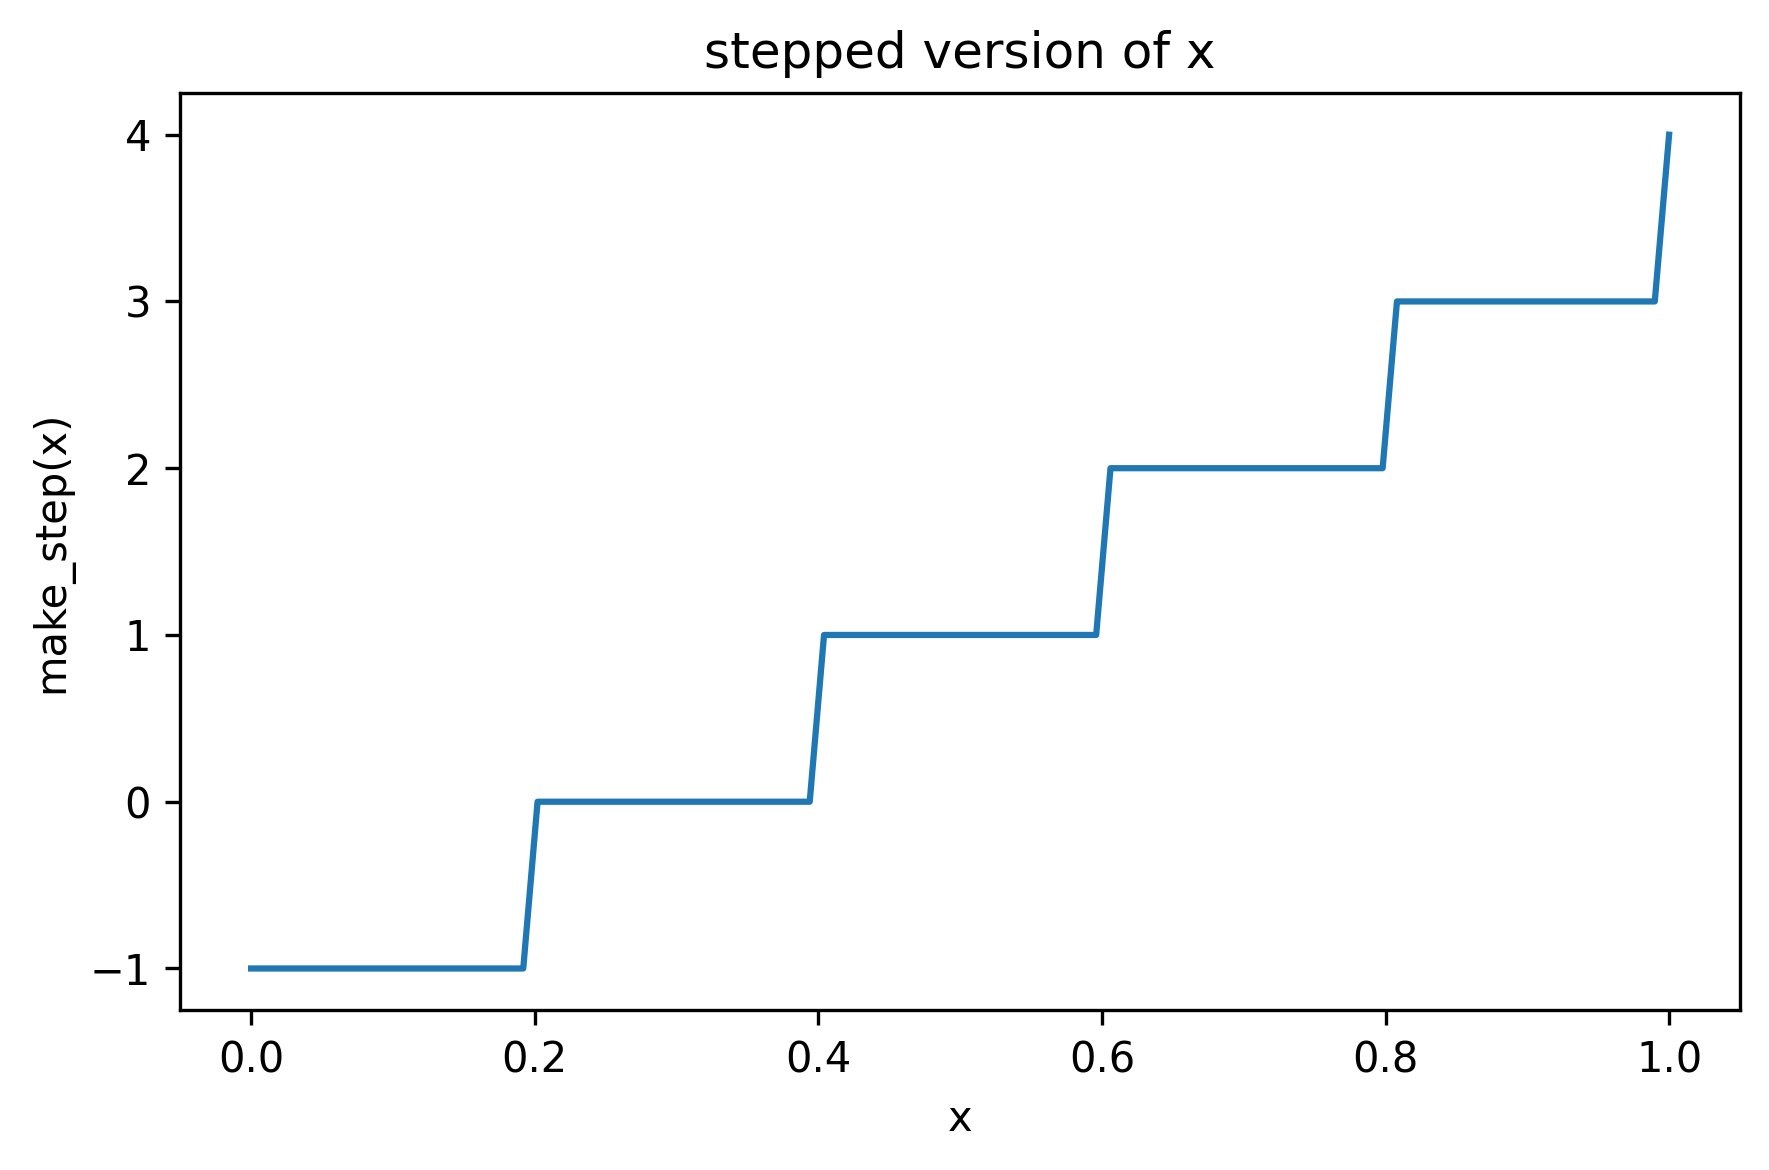

In [119]:
def make_step(x, pct):
    """
    Converts np ndarray or pd series of contiguous numbers to a stepped output that can be used for grouping every pct% of data together.
    """
    return ((x/np.max(x) - pct) // pct)


#Below is a demonstration of how a contiguous array can be chunked into a step function
x = np.linspace(0,1,100)
plt.plot(x,make_step(x,0.2))
plt.title('stepped version of x')
plt.ylabel('make_step(x)')
plt.xlabel('x')
plt.tight_layout()
print(make_step(x,0.2))

#### A Technique to reindex automatically generated ticks into a time-series

In [120]:
def set_time_ticks(ax, dframe):
    """
    Converts integer indexed axis labels to time-based labels, preserves tick spacing and placement.
    """
    xt = ax.get_xticks()                                              #index based xticks
    int_xticklabels = [int(n) for n in ax.get_xticks()][1:-1]         #remove empty leading and trailing labels
    int_xticklabels[-1] = min(dframe.index.max(),int_xticklabels[-1]) #edge case where the last tick was chosen outside of dframe's time span (last chart group)
    time_xticklabels = dframe.loc[int_xticklabels,'time']             #generate time based ticks via integer index lookup
    ax.set_xticks(xt[1:-1])                                           #must set ticks prior to labels to avoid fixed formatter error
    ax.set_xticklabels(time_xticklabels)
    
def plot_candles_nt(dframe, n_bars, o_name, h_name, l_name, c_name, bodyw = 2):
    """
    Plots non-time series candlestick charts on the given axis, grouped by every n_bars, using data from the given dataframe. 
    Must specify each ohlcv column's name in the provided dataframe.
    Leverages Matplotlib's automatic plot formatting for tick positioning.
    """
    hour_grps = dframe.groupby(make_step(dframe.index, n_bars/dframe.index[-1])) #trick to group every n_bars of the data separately
    hdfs = [df for _, df in hour_grps]
    pct_show = 0.03                                                           #percentage of plots to show
    n_plots = int(len(hdfs)*pct_show)                                         #convert to number of plots to show
    fig, axs = plt.subplots(n_plots,1 ,sharex=False, figsize=(30,10*n_plots)) #dynamically create axes by number of groups available

    for i, df in enumerate(reversed(hdfs)):
        if i > n_plots-1:
            break
        plot_candles(axs[i],df,o_name,h_name,l_name,c_name,bodyw) #plot range chart for each n_bars
        set_time_ticks(axs[i],dframe)                             #conver ticks to time based
    fig.suptitle(f'10 Range Charts for Every {n_bars} Bars',fontsize=24,y=0.97)
    fig.tight_layout()

plot_candles_nt(df,200,'open','high','low','close')

#### Indicator plotting on range charts with time-reindexing

In [122]:
f,a = plot_indis_demo(df.head(200),'open','high','low','close','volume',ax_lambda=set_time_ticks) #reuse the indicator demo function, pass the tick conversion function via ax_lambda
f.suptitle('Range Chart Indicator Plotting Demo',fontsize=24)


Text(0.5, 0.98, 'Range Chart Indicator Plotting Demo')

## License
MIT License

Copyright (c) 2021 rahul prakash

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

Use these techniques and tools at your own risk, I am not responsible for any trade performance as a result.